# Carregando os pacotes

In [0]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import bs4 as bs
import pickle
import requests


In [0]:
style.use('ggplot')
start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)
df = web.DataReader('TSLA','yahoo',start,end)

In [53]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


In [0]:
df.to_csv('tsla.csv')

In [55]:
df.shape

(1640, 6)

In [0]:
df = pd.read_csv('tsla.csv', parse_dates = True, index_col= 0 )

In [57]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


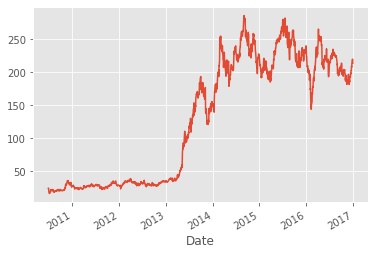

In [58]:
df['Adj Close'].plot()

In [59]:
df[['Open','High']].head()

,Open,High
Date,,
2010-06-29,19.000000,25.00
2010-06-30,25.790001,30.42
2010-07-01,25.000000,25.92
2010-07-02,23.000000,23.10
2010-07-06,20.000000,20.00


# Calculando o EMA 100

In [0]:
df['100ma'] = df['Adj Close'].rolling(window = 100).mean()

In [61]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2016-12-23,213.449997,207.710007,208.000000,213.339996,4670500,213.339996,202.6190
2016-12-27,222.250000,214.419998,214.880005,219.529999,5915700,219.529999,202.5082
2016-12-28,223.800003,217.199997,221.529999,219.740005,3782500,219.740005,202.4053
2016-12-29,219.199997,214.119995,218.559998,214.679993,4045000,214.679993,202.2905
2016-12-30,217.500000,211.679993,216.300003,213.690002,4642600,213.690002,202.1366


# Excluindo NA

In [0]:
df.dropna(inplace = True)

In [63]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2010-11-17,30.750000,28.610001,30.200001,29.490000,750000,29.490000,20.9879
2010-11-18,30.740000,28.920000,30.670000,29.889999,956100,29.889999,21.0479
2010-11-19,31.370001,29.700001,30.160000,30.990000,1150500,30.990000,21.1195
2010-11-22,33.450001,31.500000,31.570000,33.400002,1529700,33.400002,21.2339
2010-11-23,35.680000,32.189999,33.290001,34.570000,1577800,34.570000,21.3876


In [64]:
# Usando o atributo min_periods = 0, nos períodos menores que 100 dias o pandas irá atribuir o próprio dia do fechamento
df['100ma'] = df['Adj Close'].rolling(window = 100, min_periods = 0).mean()
df.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2010-11-17,30.750000,28.610001,30.200001,29.490000,750000,29.490000,29.490000
2010-11-18,30.740000,28.920000,30.670000,29.889999,956100,29.889999,29.690000
2010-11-19,31.370001,29.700001,30.160000,30.990000,1150500,30.990000,30.123333
2010-11-22,33.450001,31.500000,31.570000,33.400002,1529700,33.400002,30.942500
2010-11-23,35.680000,32.189999,33.290001,34.570000,1577800,34.570000,31.668000


<BarContainer object of 1541 artists>

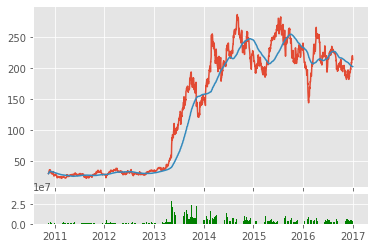

In [99]:
# Plotando os dados

ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan= 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan= 1, sharex = ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'], color = 'green')

# Fazendo uma Reamostragem

In [0]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()


In [67]:
df_ohlc.head()

,open,high,low,close
Date,,,,
2010-11-17,29.490000,35.470001,29.490000,35.320000
2010-11-27,34.330002,35.330002,30.309999,30.309999
2010-12-07,31.559999,32.369999,28.530001,30.809999
2010-12-17,31.360001,32.630001,30.090000,30.090000
2010-12-27,25.549999,27.730000,25.549999,26.830000


In [68]:
pip install https://github.com/matplotlib/mpl_finance/archive/master.zip


  Using cached https://github.com/matplotlib/mpl_finance/archive/master.zip
  Created wheel for mpl-finance: filename=mpl_finance-0.10.1-cp36-none-any.whl size=8423 sha256=fb017cae583503810b4cd7926ca65880b7d4d4a2e54f35efdef8062f13097aa1
  Stored in directory: /tmp/pip-ephem-wheel-cache-91_4hv1o/wheels/8f/bf/8a/6c858b2a3be945c7b2d658fbf6ab797b451d686cbee8aa2679
Successfully built mpl-finance


In [0]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

In [70]:
df_ohlc.reset_index(inplace = True)
df_ohlc.head()

,Date,open,high,low,close
0,2010-11-17,29.490000,35.470001,29.490000,35.320000
1,2010-11-27,34.330002,35.330002,30.309999,30.309999
2,2010-12-07,31.559999,32.369999,28.530001,30.809999
3,2010-12-17,31.360001,32.630001,30.090000,30.090000
4,2010-12-27,25.549999,27.730000,25.549999,26.830000


In [71]:
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
df_ohlc.head()

,Date,open,high,low,close
0,734093.0,29.490000,35.470001,29.490000,35.320000
1,734103.0,34.330002,35.330002,30.309999,30.309999
2,734113.0,31.559999,32.369999,28.530001,30.809999
3,734123.0,31.360001,32.630001,30.090000,30.090000
4,734133.0,25.549999,27.730000,25.549999,26.830000


In [0]:
ax1.xaxis_date()
candlestick_ohlc(ax1, df_ohlc.values,width = 2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)

plt.show()



In [0]:
def save_sp500_tickers():
  resp = requests.get("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
  soup = bs.BeautifulSoup(resp.text)
  table = soup.find('table',{'class':'wikitable sortable'})
  tickers = []
  for row in table.findAll('tr')[1:]:
    ticker = row.find_all('td') [0].text.replace('\n','')
    tickers.append(ticker)
  with open('sp500tickers.pickle','wb') as f:
    pickle.dump(tickers,f)
  return tickers

In [0]:
save_sp500_tickers()


# Obtendo os dados do Yahoo

In [0]:
def get_data_from_yahoo(reload_sp500 = False):
  if reload_sp500:
    ticker = save_sp500_tickers()
  else:
    with open('sp500tickers.pickle','rb') as f:
      tickers = pickle.load(f)
  if not os.path.exists('stock_dfs'):
    os.makedirs('stock_dfs')

  start = dt.datetime(2000,1,1)
  end = dt.datetime(2016,12,31)

  for ticker in tickers:
    if not os.path

